<a href="https://colab.research.google.com/github/KevKibe/Marble-Surface-Anomaly-Detection-using-CNN-model/blob/main/marble_surface_ntbk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle --quiet

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d wardaddy24/marble-surface-anomaly-detection

marble-surface-anomaly-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip marble-surface-anomaly-detection.zip 

Archive:  marble-surface-anomaly-detection.zip
replace marble/defect/IMG_20210525_133755.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace marble/defect/IMG_20210525_144257_LL.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!pip install tensorflow --quiet
!pip install keras --quiet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
import keras as ks
import os
import cv2
from tqdm import tqdm
import warnings
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

warnings.filterwarnings('ignore')

In [ ]:

data_dir = '/content/marble'

# create lists to store the image paths and labels
image_paths = []
labels = []

# iterate over the subdirectories for each class
for class_name in ['defect', 'good']:
    class_dir = os.path.join(data_dir, class_name)
    # iterate over the images in the class directory
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        # add the image path and label to the lists
        image_paths.append(image_path)
        labels.append(class_name)

# create a DataFrame with the image paths and labels
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# display the first few rows of the DataFrame
print(df.head())


                                          image_path   label
0  /content/marble/defect/IMG_20210525_144957_LL.jpg  defect
1  /content/marble/defect/IMG_20210531_173014_LL.jpg  defect
2  /content/marble/defect/IMG_20210531_172926_LL.jpg  defect
3  /content/marble/defect/IMG_20210525_151502_LL.jpg  defect
4  /content/marble/defect/IMG_20210525_144257_LL.jpg  defect


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  55 non-null     object
 1   label       55 non-null     object
dtypes: object(2)
memory usage: 1008.0+ bytes


In [ ]:
df['label'].value_counts()

good      35
defect    20
Name: label, dtype: int64

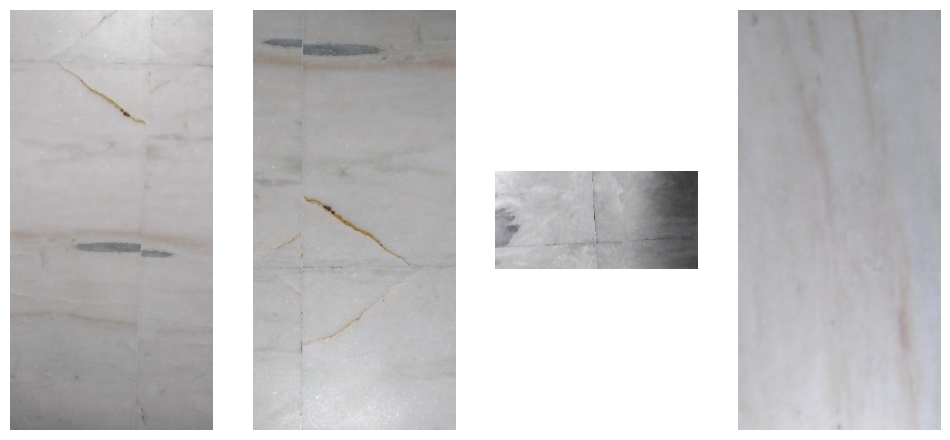

In [ ]:
def visualize_images(image_paths):
    # create a figure with subplots
    fig, axes = plt.subplots(1, len(image_paths), figsize=(12, 8))
    # iterate over the image paths and axes
    for image_path, ax in zip(image_paths, axes):
        # open the image
        image = Image.open(image_path)
        # plot the image
        ax.imshow(image)
        ax.axis('off')
    plt.show()

# get two images with defects and two that are good
defect_images = df[df['label'] == 'defect']['image_path'].sample(2)
good_images = df[df['label'] == 'good']['image_path'].sample(2)
image_paths = defect_images.tolist() + good_images.tolist()

# visualize the images
visualize_images(image_paths)


In [ ]:
# Data Preprocessing
image_size = (224, 224)
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="image_path",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    subset="training",
    class_mode="binary")
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col="image_path",
    y_col="label",
    target_size=image_size,
    batch_size=batch_size,
    subset="validation",
    class_mode="binary")

Found 44 validated image filenames belonging to 2 classes.
Found 11 validated image filenames belonging to 2 classes.


In [ ]:
# Load the pre-trained MobileNet model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, validation_data=validation_generator, epochs=50)

In [ ]:
model2.fit(train_generator, validation_data=validation_generator, epochs=20)

In [ ]:
from google.colab import files
#model.save('marble_surface_model_final_1.h5')
files.download("/content/best_weights_2.h5")


In [ ]:

from google.colab import files

model2.save('marble_surface_model_fin.h5')
files.download('marble_surface_model_fin.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# load the test image
img_path = '/content/download (3).jpg'
img = image.load_img(img_path, target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # normalize the image

# make predictions on the test image
predictions = model2.predict(x)
if predictions[0][0] < 0.5:
    print("Defective")
else:
    print("Good")


1/1 [==============================] - 1s 713ms/step
Good
